# k-NN regression problem (Standard & Optimized model)
I am using the very famous "Abalone" dataset and to idetify the Age of the Abalone from the Rings (output)

In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
dataset = pd.read_csv('./abalone.csv')
dataset.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### We got top 5 datapoints & can see we have 8 variables

In [3]:
#Overview of Dataset Characteristics
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [4]:
#Summary of N/A Values
dataset.isnull().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

#### It's good that we don't find any null values to treat them

In [5]:
dataset.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### (. describe) Rings has minimum Age of 1 year and maximum of 29 years.

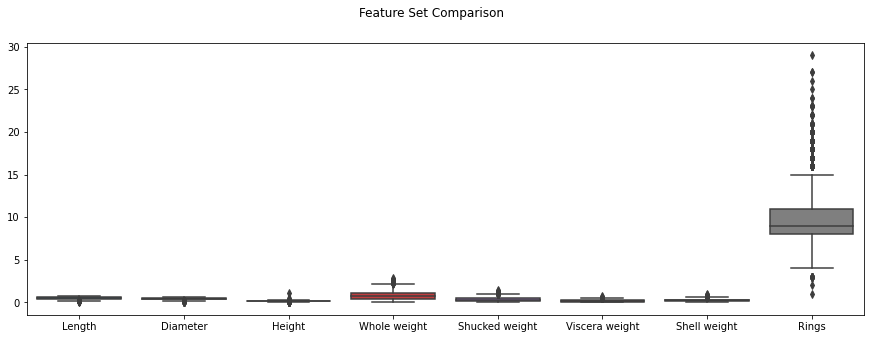

In [6]:
#BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=dataset)
plt.show()

#### The Box plot is not able to represent the distribution of the all the variables and showing lots of outliers. k-NN does not deal well with the outliers present in the data. Let's plot a Correlations map below 

<AxesSubplot:>

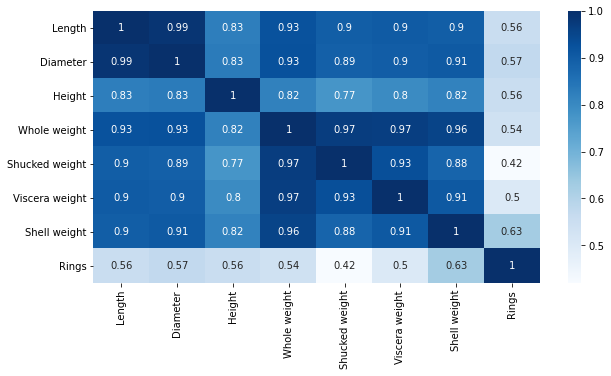

In [7]:
#Visualization of Correlations
fig = plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),annot=True,cmap="Blues")

#### It seems that all the independent variables are highly correlated to each other (Multicollinearity). We will look into  corrleation greater than 80% below. 

In [8]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(dataset,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('Diameter', 'Length'), ('Height', 'Length'), ('Height', 'Diameter'), ('Whole weight', 'Length'), ('Whole weight', 'Diameter'), ('Whole weight', 'Height'), ('Shucked weight', 'Length'), ('Shucked weight', 'Diameter'), ('Shucked weight', 'Whole weight'), ('Viscera weight', 'Length'), ('Viscera weight', 'Diameter'), ('Viscera weight', 'Whole weight'), ('Viscera weight', 'Shucked weight'), ('Shell weight', 'Length'), ('Shell weight', 'Diameter'), ('Shell weight', 'Height'), ('Shell weight', 'Whole weight'), ('Shell weight', 'Shucked weight'), ('Shell weight', 'Viscera weight')]


C:\Users\Lenovo12\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo12\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo12\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo12\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo12\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo12\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density 

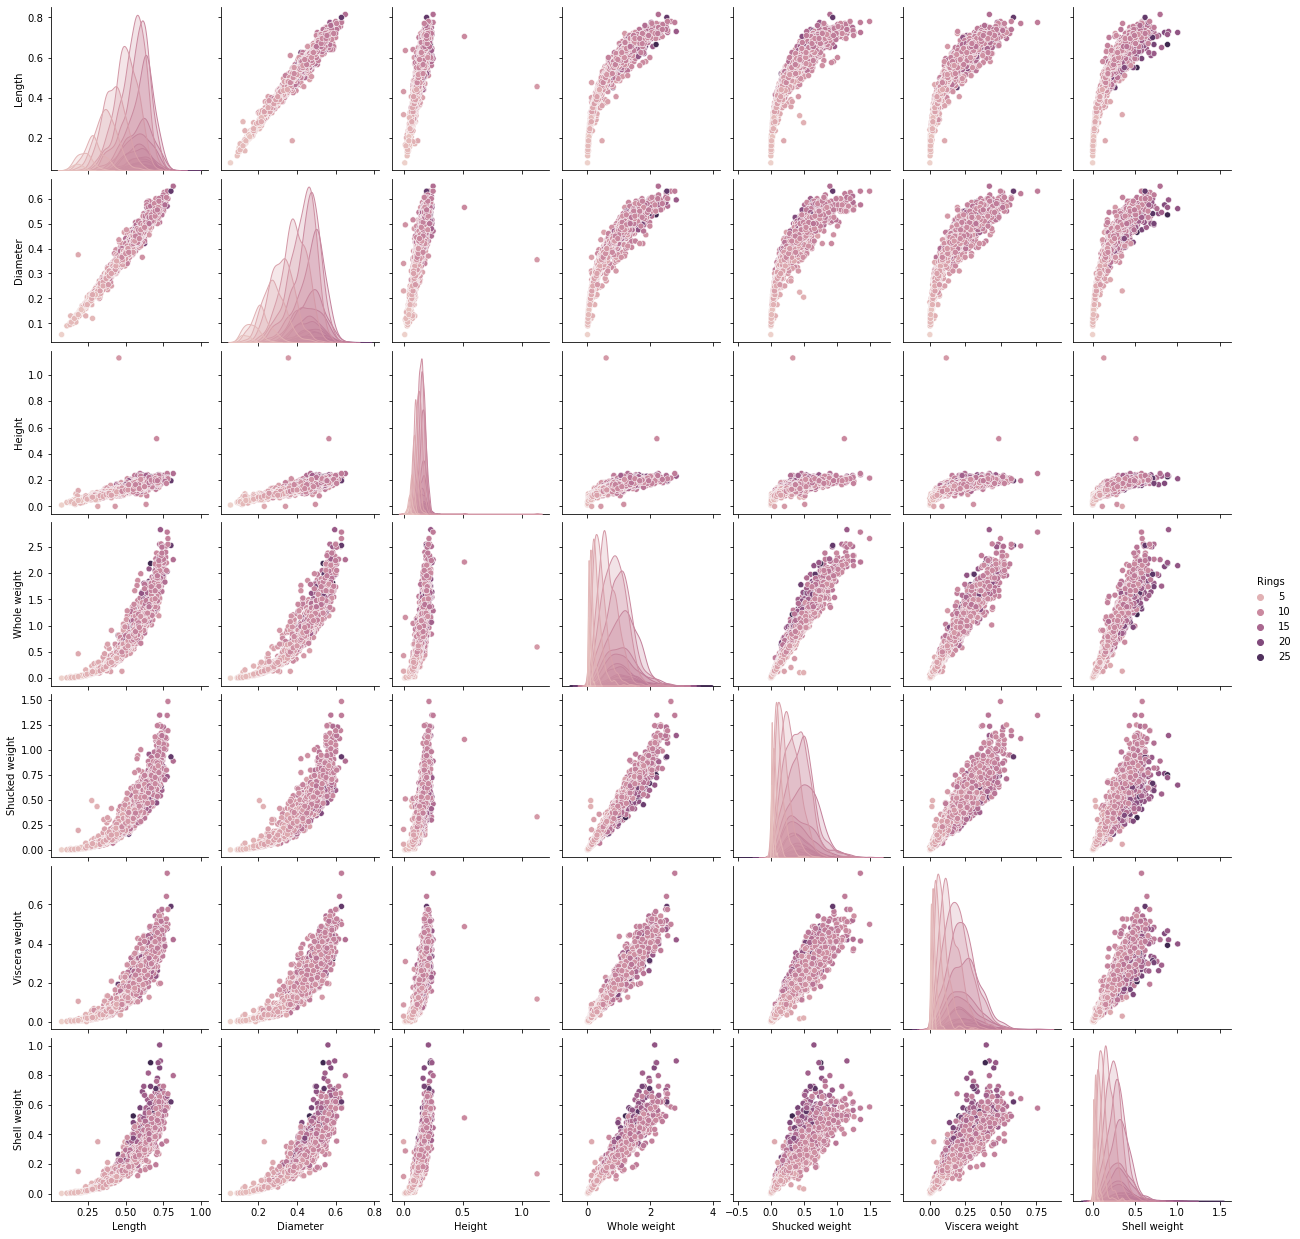

In [21]:
# Another way to see the relationship by plotting them with the help of seaboarn library
sns.pairplot(dataset,hue='Rings')

#### The distributions are skewed therefore, we have to appy StandardScaler to standardize the model.

In [9]:
#Create x and y variables
x = dataset.drop('Rings', axis=1).to_numpy()
Y = dataset['Rings'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size = 0.2,random_state = 100) 

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

#Model
from sklearn.neighbors import KNeighborsRegressor

#### we drop the Rings variable to y axis. Using 80-20% split (train-test) and using absolute random state 100, and then with the sklearn library we are using standard scaler to standarize the data.

In [10]:
#Learning Curve
from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train2, 
                                                            y=Y_train,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring = 'neg_root_mean_squared_error',
                                                            cv=10, random_state=100)
    
    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    train_std = np.sqrt(np.std(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))
    test_std = np.sqrt(np.std(-test_scores, axis=1))
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('RMSE')
    plt.legend(loc='best')
    plt.ylim([0,10])
    plt.show()

k-NN Regressor Learning Curve


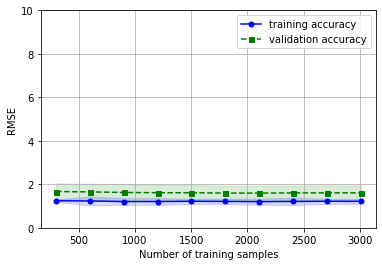

In [11]:
#Plot Learning Curve
print('k-NN Regressor Learning Curve')
plot_learning_curves(KNeighborsRegressor(2))

#### The learning curve is almost static and not learning anything from the increase number of samples and training accuracy is below than validation accuracy though its just a notebook difference.

In [12]:
#Bias and Variance
from mlxtend.evaluate import bias_variance_decomp

#Script for Bias Variance
print('Bias Variance Trade-Off')
for name,method in[('kNN',KNeighborsRegressor(2))]:        
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        method, x_train2, Y_train, x_test2, Y_test, 
        loss='mse',
        random_seed=100)
    print('\nEstimator: {}'.format(name)) 
    print('Average Bias: {:.2f}'.format(avg_bias))
    print('Average Variance: {:.2f}'.format(avg_var))

Bias Variance Trade-Off

Estimator: kNN
Average Bias: 5.69
Average Variance: 1.64


In [13]:
#Original Model - KNN

#Search for an optimal value of K for KNN
from sklearn.model_selection import cross_val_score
from sklearn import metrics  

k_range = range(1, 40)
k_scores = []

for k in k_range:
    knn_org = KNeighborsRegressor(n_neighbors=k)
    #obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn_org, x_train2, Y_train, cv=10, scoring='neg_root_mean_squared_error')
    #append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
    
#Print Best Score
BestScore = [1 - x for x in k_scores]
best_k = k_range[BestScore.index(min(BestScore))]

#Create Orginal KNN model
classifier_org = KNeighborsRegressor(n_neighbors = best_k)

#Fit KNN Model
classifier_org.fit(x_train2, Y_train)

#Prediction
y_pred_org = classifier_org.predict(x_test2)

print('Original Model')
print('\nn_neighbors:',str(best_k))
print('\nR2: {:.2f}'.format(metrics.r2_score(Y_test, y_pred_org)))
adjusted_r_squared = 1-(1-metrics.r2_score(Y_test,y_pred_org))*(len(Y)-1)/(len(Y)-x.shape[1]-1)

print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(Y_test, y_pred_org)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(Y_test, y_pred_org)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(Y_test, y_pred_org)))) 

Original Model

n_neighbors: 17

R2: 0.53
Adj_R2: 0.53
Mean Absolute Error: 1.52
Mean Squared Error: 4.83
Root Mean Squared Error: 2.20


#### The R Squared & Adjusted R Squared are only 51% (Quite low) though Adj R2 will never be higher than R2. MSE 1.57 and RMSE is 2.24 meaning there is some variation in the magnitude of the errors due to multiple features.  

In [15]:
#Gridsearch

from sklearn.model_selection import GridSearchCV

#k-NN Regression Model
knnreg2 = KNeighborsRegressor()
k_range = range(1, 40)
param_grid = { 
           'n_neighbors': k_range,
           'algorithm' : ['auto','ball_tree','kd_tree','brute'],
           'weights' : ['uniform','distance']}

knn_model = GridSearchCV(knnreg2, param_grid, cv=10, verbose=0,
                         scoring='neg_root_mean_squared_error')

grids = [knn_model] 
grid_dict = {0:'k-NN Regression Model'}

#Model Creation

#Create Heading
print('Optimized Model') 

#Fit the grid search objects 
for idx, optmodel in enumerate(grids): 
     print('\nEstimator: {}'.format(grid_dict[idx])) 
    
    #Fit grid search
     optmodel.fit(x_train2, Y_train) 
    
    #Best params 
     print('\nBest params: {}'.format(optmodel.best_params_)) 
     # Predict on test data with best params 
     y_pred3 = optmodel.predict(x_test2) 
    
    # Test data accuracy of model with best params    
     print('\nR2: {:.2f}'.format(metrics.r2_score(Y_test, y_pred3)))
     adjusted_r_squared = 1-(1-metrics.r2_score(Y_test,y_pred3))*(len(Y)-1)/(len(Y)-x.shape[1]-1)
     print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))  
    
    #Print MSE and RMSE
     print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(Y_test, y_pred3)))
     print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(Y_test, y_pred3)))
     print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(Y_test, y_pred3))))  

Optimized Model

Estimator: k-NN Regression Model

Best params: {'algorithm': 'auto', 'n_neighbors': 25, 'weights': 'distance'}

R2: 0.54
Adj_R2: 0.54
Mean Absolute Error: 1.51
Mean Squared Error: 4.80
Root Mean Squared Error: 2.19


#### The base model has selected n_neighbors 17 while, the optmized model did select n_neighbors of 25. But the results are still not impressive and this model is of no use. We should try Logistic regression, LDA or QDA. 